In [2]:
import numpy as np
import matplotlib.pyplot as plt


def gaussian_1d(x, mu=0, std=1):
    return np.exp(-0.5*((x-mu)/std)**2) / (2*np.pi*std**2)**(1/2)

def subtractive(center, surround):
    return center - surround

def divisive(center, surround):
    return (center + 1) / (surround + 1) - 1

def blommaert(center, surround):
    return (center - surround) / (center + 1)

center_sigma = 1
surround_sigma = 2
spread = surround_sigma * 4
num_datapoints = 101
plateau_width = 10

x = np.linspace(0, spread, num_datapoints)
delta_function = np.zeros(x.shape)
delta_function[0:plateau_width] = 1
center_response = np.array([np.sum(gaussian_1d(delta_function, mu=xi, std=center_sigma)) for xi in x])
surround_response = np.array([np.sum(gaussian_1d(delta_function, mu=xi, std=surround_sigma)) for xi in x])

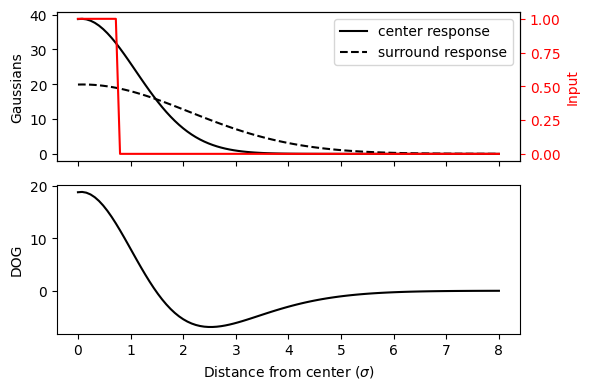

In [ ]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(6,4), sharex=True)
ax0_twin = ax0.twinx()
ax0_twin.plot(x, delta_function, "r-")
ax0_twin.set_ylabel("Input")
ax0_twin.yaxis.label.set_color('red')
ax0_twin.tick_params(axis='y', colors='red')

ax0.plot(x, center_response, "k-", label="center response")
ax0.plot(x, surround_response, "k--", label="surround response")
ax0.legend()
ax0.set_ylabel("Gaussians")
ax1.plot(x, subtractive(center_response, surround_response), "k-", label="center minus surround")
ax1.set_ylabel("DOG")
ax1.set_xlabel(r"Distance from center ($\sigma$)")
fig.tight_layout()

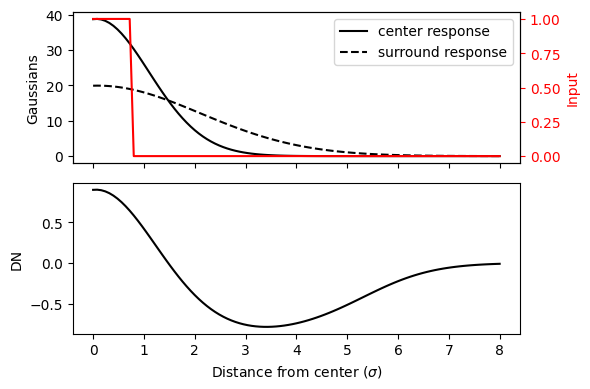

In [14]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(6,4), sharex=True)
ax0_twin = ax0.twinx()
ax0_twin.plot(x, delta_function, "r-")
ax0_twin.set_ylabel("Input")
ax0_twin.yaxis.label.set_color('red')
ax0_twin.tick_params(axis='y', colors='red')

ax0.plot(x, center_response, "k-", label="center response")
ax0.plot(x, surround_response, "k--", label="surround response")
ax0.legend()
ax0.set_ylabel("Gaussians")
ax1.plot(x, divisive(center_response, surround_response), "k-", label="divisive normalization")
ax1.set_ylabel("DN")
ax1.set_xlabel(r"Distance from center ($\sigma$)")
fig.tight_layout()

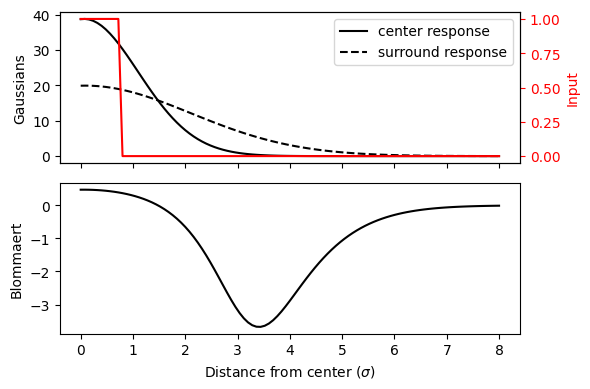

In [3]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(6,4), sharex=True)
ax0_twin = ax0.twinx()
ax0_twin.plot(x, delta_function, "r-")
ax0_twin.set_ylabel("Input")
ax0_twin.yaxis.label.set_color('red')
ax0_twin.tick_params(axis='y', colors='red')

ax0.plot(x, center_response, "k-", label="center response")
ax0.plot(x, surround_response, "k--", label="surround response")
ax0.legend()
ax0.set_ylabel("Gaussians")
ax1.plot(x, blommaert(center_response, surround_response), "k-", label="Blommaert-Martens")
ax1.set_ylabel("Blommaert")
ax1.set_xlabel(r"Distance from center ($\sigma$)")
fig.tight_layout()